<a href="https://colab.research.google.com/github/davro76/Data-Mining-Process/blob/main/DataWrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Prepare Problem
# a) Load libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
# b) Load dataset
# Data Dictionary: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset
df = pd.read_csv("https://raw.githubusercontent.com/fenago/introml/main/Life%20Expectancy%20Data.csv")


In [ ]:
# Basic Data Cleaning
df.columns = df.columns.str.lower().str.replace(' ', '_') # A
 
string_columns = list(df.dtypes[df.dtypes == 'object'].index) # B
 
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_') # C
df = df.rename(columns=lambda x: x.strip())

In [ ]:
# Set the Environment
# Ignore Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Write out the versions of all packages to requirements.txt
!pip freeze >> requirements.txt

# Remove the restriction on Jupyter that limits the columns displayed (the ... in the middle)
pd.set_option('max_columns',None)
# Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html#

# Pretty Display of variables.  for instance, you can call df.head() and df.tail() in the same cell and BOTH display w/o print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# List of ALL Magic Commands.  To run a magic command %var  --- i.e.:  %env
%lsmagic
# %env  -- list environment variables
# %%time  -- gives you information about how long a cel took to run
# %%timeit -- runs a cell 100,000 times and then gives you the average time the cell will take to run (can be LONG)
# %pdb -- python debugger
# to display nice model diagram
from sklearn import set_config
set_config(display='diagram')

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

print(np.__version__)
print(sklearn.__version__)

1.21.6
1.0.2


In [ ]:
%%time
# 2. Structural Investigation of the Data
# a) Basic data queries
df.sample(3)

CPU times: user 4.06 ms, sys: 3 µs, total: 4.06 ms
Wall time: 8.42 ms


,country,year,status,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,_bmi_,under-five_deaths_,polio,total_expenditure,diphtheria_,_hiv/aids,gdp,population,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling
760,djibouti,2008,developing,62.0,289.0,1,0.49,171.768645,88.0,143,31.3,2,89.0,8.50,89.0,3.3,1214.771180,822934.0,5.7,5.6,0.427,5.0
1111,guyana,2010,developing,65.9,221.0,0,7.52,48.028594,95.0,0,42.4,1,95.0,6.60,95.0,0.4,326.281212,746556.0,5.6,5.3,0.618,10.2
106,armenia,2005,developing,73.0,137.0,1,4.25,20.218228,91.0,2281,48.8,1,92.0,5.25,9.0,0.1,1643.758397,2981259.0,2.0,2.1,0.679,10.9


In [ ]:
# Show size of the dataset
print("Columns and Rows: \n", df.shape, "\n")
print("General Information: \n", df.info(), "\n")
# b) Validate and change all data types
print(df.dtypes)

Columns and Rows: 
 (2938, 22) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy_                 2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles_                         2938 non-null   int64  
 10  _bmi_                            2904 non-null   float64
 11  under-five_deaths_               2938 non-null   

In [ ]:
# IMPORTANT:  Change data types to the correct data types
# EXAMPLE of one but you may have to repeat this process
# Change data type of 'sex_of_Driver'
df['measles_'] = df['measles_'].astype('int64')
# df["cubicinches"]=pd.to_numeric(df["cubicinches"], errors='coerce')
# df["weightlbs"]=pd.to_numeric(df["weightlbs"], errors='coerce')

In [ ]:
# Treat obviously incorrect values in your dataset

# If you have values in your columns that you want to replace - use this for loop
# For instance - in the CreditScoring dataset - there are numerous 99999999 that need to be replaced

# for c in ['income', 'assets', 'debt']:
#    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [ ]:
# If you want to remove a value from a column - use this: 
# df = df[df.status != 'unk']   # This removes the value 'unk' from your data in the column.  Modify as needed

In [ ]:
# Count how many times each data type is present in the dataset
pd.value_counts(df.dtypes)

float64    16
int64       4
object      2
dtype: int64

In [ ]:
# How many unique values per feature
df.nunique().to_frame().T

,country,year,status,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,_bmi_,under-five_deaths_,polio,total_expenditure,diphtheria_,_hiv/aids,gdp,population,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling
0,193,16,2,362,425,209,1076,2328,87,958,608,252,73,818,81,200,2490,2278,200,207,625,173


In [ ]:
df.dtypes.to_frame()

,0
country,object
year,int64
status,object
life_expectancy_,float64
adult_mortality,float64
infant_deaths,int64
alcohol,float64
percentage_expenditure,float64
hepatitis_b,float64
measles_,int64


In [ ]:
# c) Split into Numeric List and Categorical List
# Split the data into numeric and categorical lists and dataframes
numerics = ['int16','int32','int64','float64']
catDF = df.select_dtypes(exclude=numerics)
numDF = df.select_dtypes(include=numerics)
catDF.head()
numDF.head()

,country,status
0,afghanistan,developing
1,afghanistan,developing
2,afghanistan,developing
3,afghanistan,developing
4,afghanistan,developing


,year,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,_bmi_,under-five_deaths_,polio,total_expenditure,diphtheria_,_hiv/aids,gdp,population,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
# This is how you merge the datasets back together:
# Merge back into a single df
# preparing the X Variables  (Don't forget ot remove the target!!)
X = pd.concat([catDF,numDF],axis=1)
print(X.shape)

# This is how you extract the target variable
# y = df_X['Sex_of_Driver']
# X.drop(['Sex_of_Driver'],axis=1,inplace=True)

(2938, 22)


In [ ]:
# 3. Qualitative Investigation of the Data
# a) Duplicates
# Duplicates in the Columns?
df.duplicated()
df.duplicated().sum()

# Duplicated Rows?
df[df.duplicated()]

0       False
1       False
2       False
3       False
4       False
        ...  
2933    False
2934    False
2935    False
2936    False
2937    False
Length: 2938, dtype: bool

0

,country,year,status,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,_bmi_,under-five_deaths_,polio,total_expenditure,diphtheria_,_hiv/aids,gdp,population,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling


In [ ]:
# Check number of duplicates while ignoring the index feature
n_duplicates = df.drop(labels=['status'], axis=1).duplicated().sum()

print(f"You seem to have {n_duplicates} duplicates in your database.")

#  Extract column names of all features, except 'Accident_Index'
columns_to_consider = df.drop(labels=['status'], axis=1).columns

# Drop duplicates based on 'columns_to_consider'
df.drop_duplicates(subset=columns_to_consider, inplace=True)
df.shape

You seem to have 0 duplicates in your database.


(2938, 22)

,country,year,status,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,_bmi_,under-five_deaths_,polio,total_expenditure,diphtheria_,_hiv/aids,gdp,population,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2934,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2935,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2936,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


country                              0
year                                 0
status                               0
life_expectancy_                    10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles_                             0
_bmi_                               34
under-five_deaths_                   0
polio                               19
total_expenditure                  226
diphtheria_                         19
_hiv/aids                            0
gdp                                448
population                         652
_thinness__1-19_years               34
_thinness_5-9_years                 34
income_composition_of_resources    167
schooling                          163
dtype: int64

<Figure size 1080x576 with 0 Axes>

Text(0.5, 50.09375, 'Column Number')

Text(114.0, 0.5, 'Sample Number')

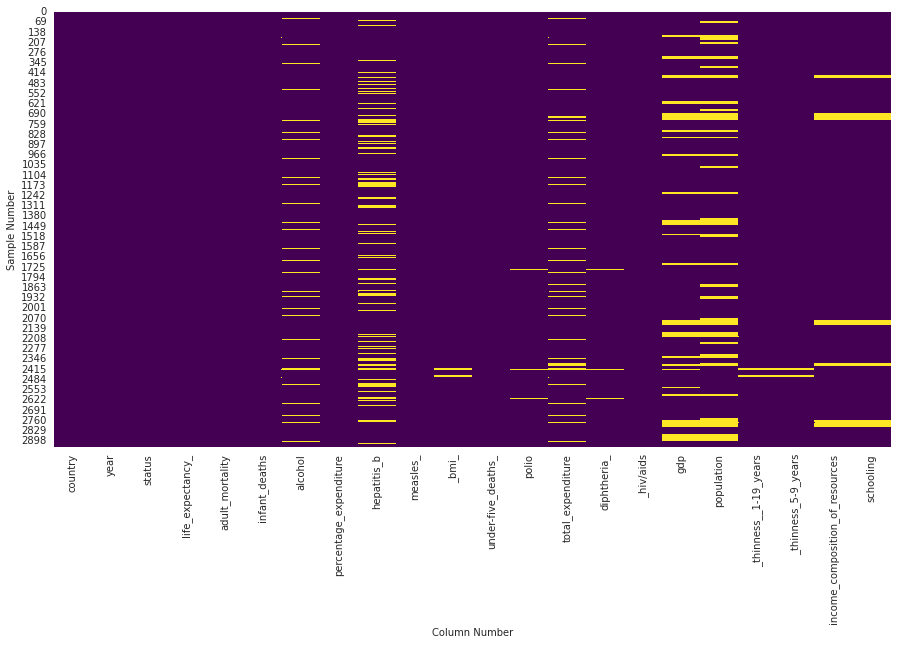

In [ ]:
# MISSING VALUES
df.isna()
df.isna().sum()

# Check for missing values in a single column
# df[df['Description'].isna()]

# List all rows that are missing a value in this field
# df.dropna(subset=['Description'])  

# Drop all rows that are missing a value in this field:
# df.dropna(subset=['Description'], inplace=True)

# b) Missing Values per Sample (Big Holes)


plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')

g = sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
# g = sns.heatmap(df_X.loc[df_X.isnull().sum(1).sort_values(ascending=1).index].isnull(), cbar=False, cmap='viridis')
g.set_xlabel('Column Number')
g.set_ylabel('Sample Number')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


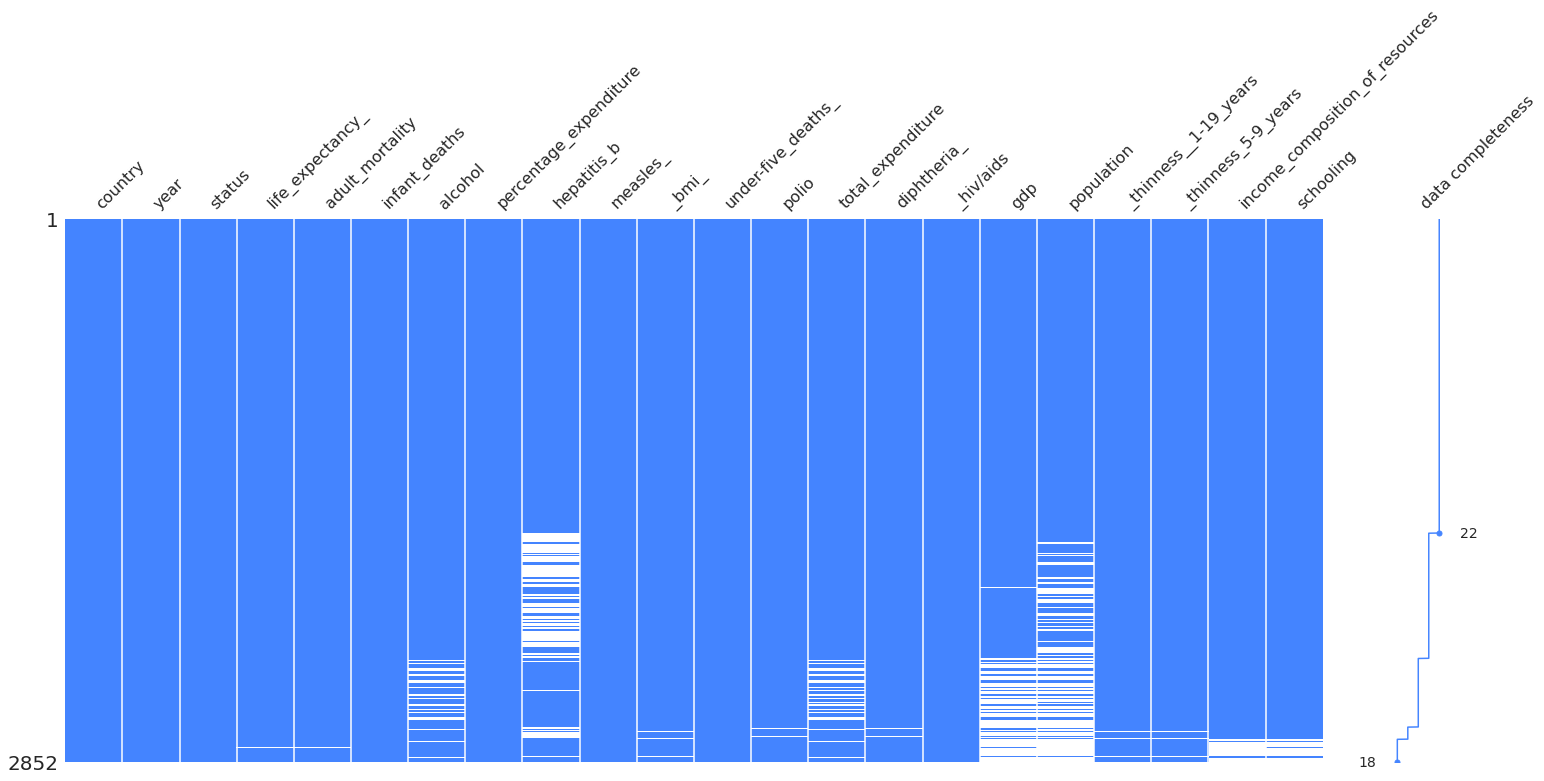

In [ ]:
!pip install missingno
import missingno as msno
msno.matrix(df, labels=True, sort='descending', color=(0.27, 0.52, 1.0));

In [ ]:
# Drop rows that are 20% or more empty (you set the threshold)
df = df.dropna(thresh=df.shape[1] * 0.80, axis=0).reset_index(drop=True)
df.shape

(2852, 22)

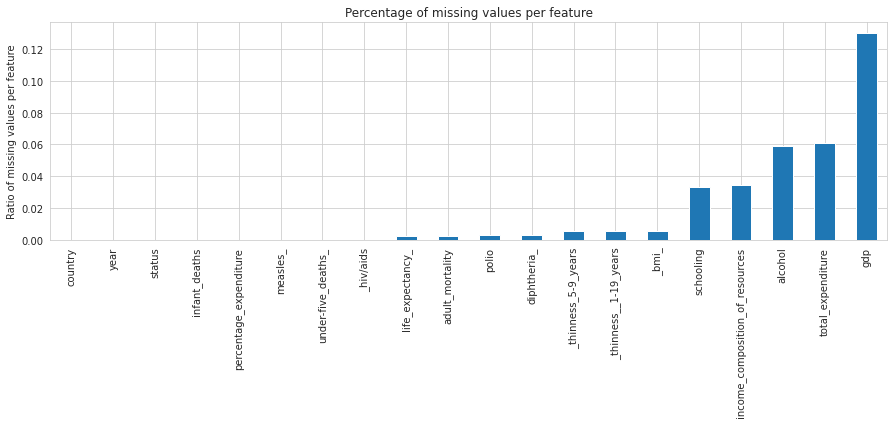

In [ ]:
# c) Missing Values per Feature (Big Holes)
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

In [ ]:
df = df.dropna(thresh=df.shape[0] * 0.85, axis=1)
df.shape

(2852, 20)

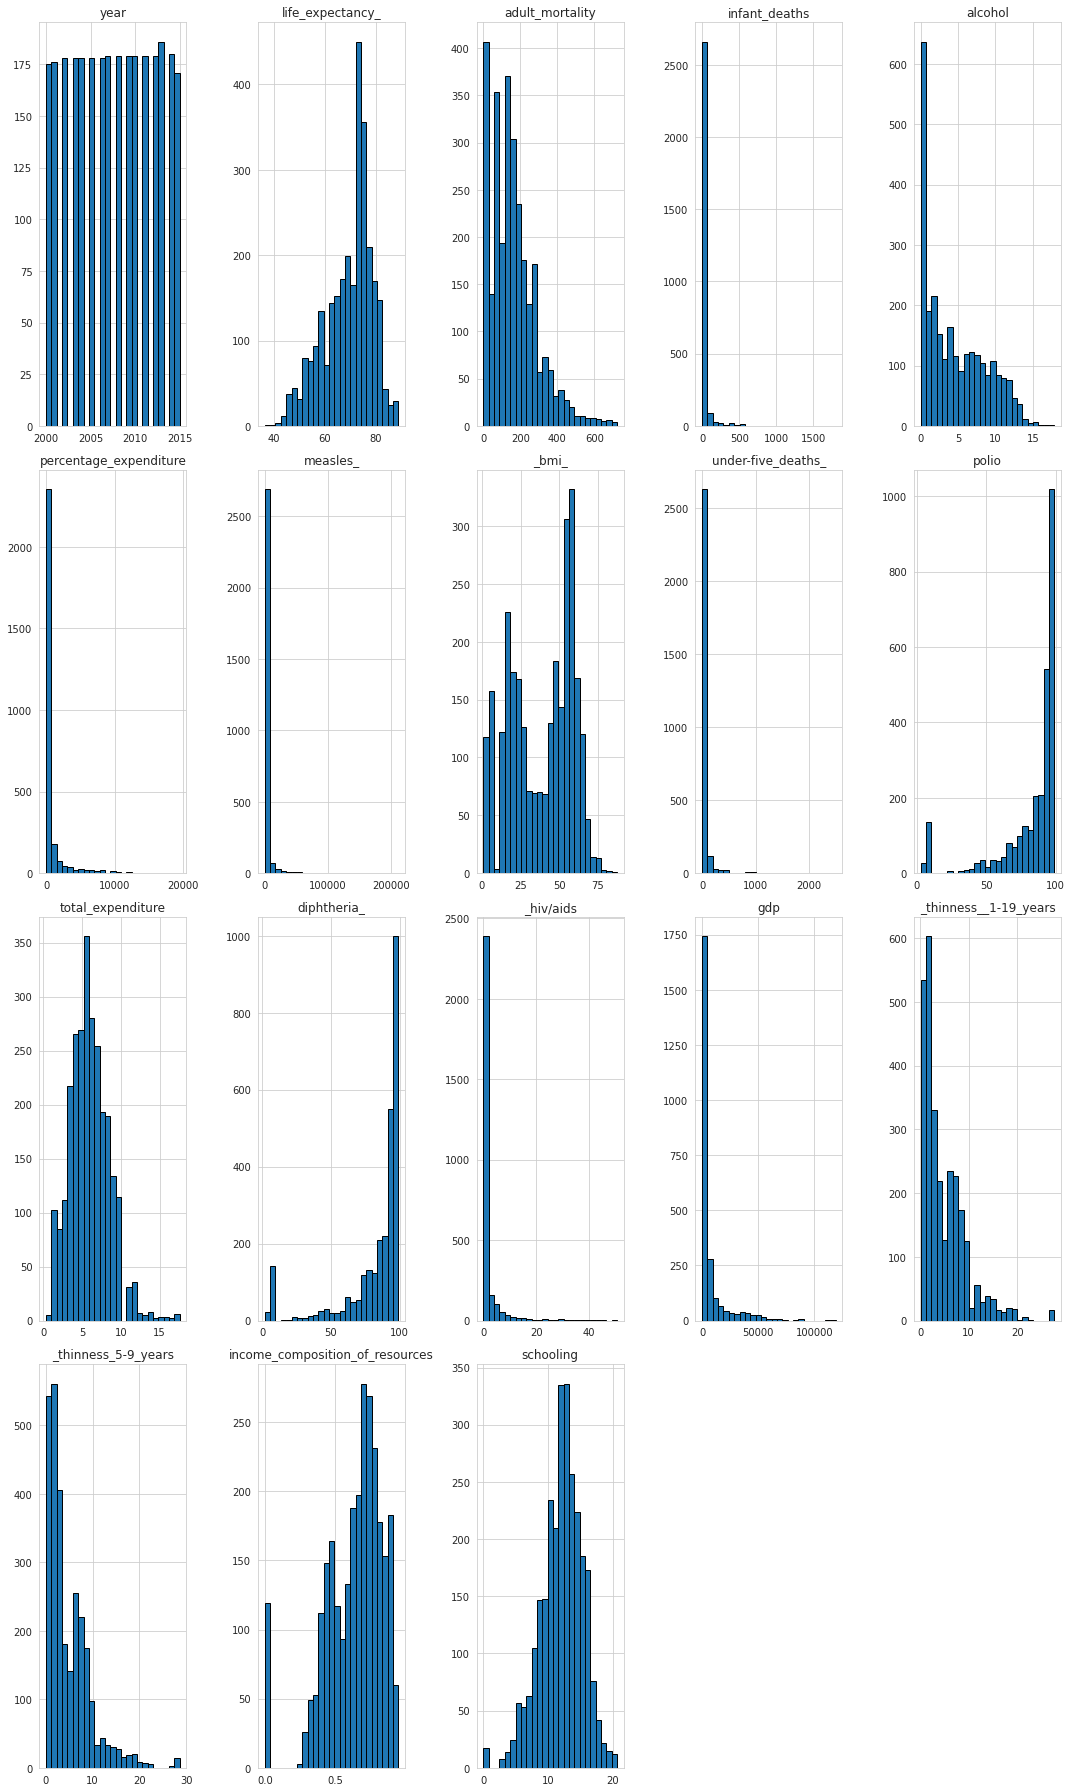

In [ ]:
# 4. Content Investigation of the Data
# a) Distributions of data in each feature
# Plots the histogram for each numerical feature in a separate subplot
df.hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

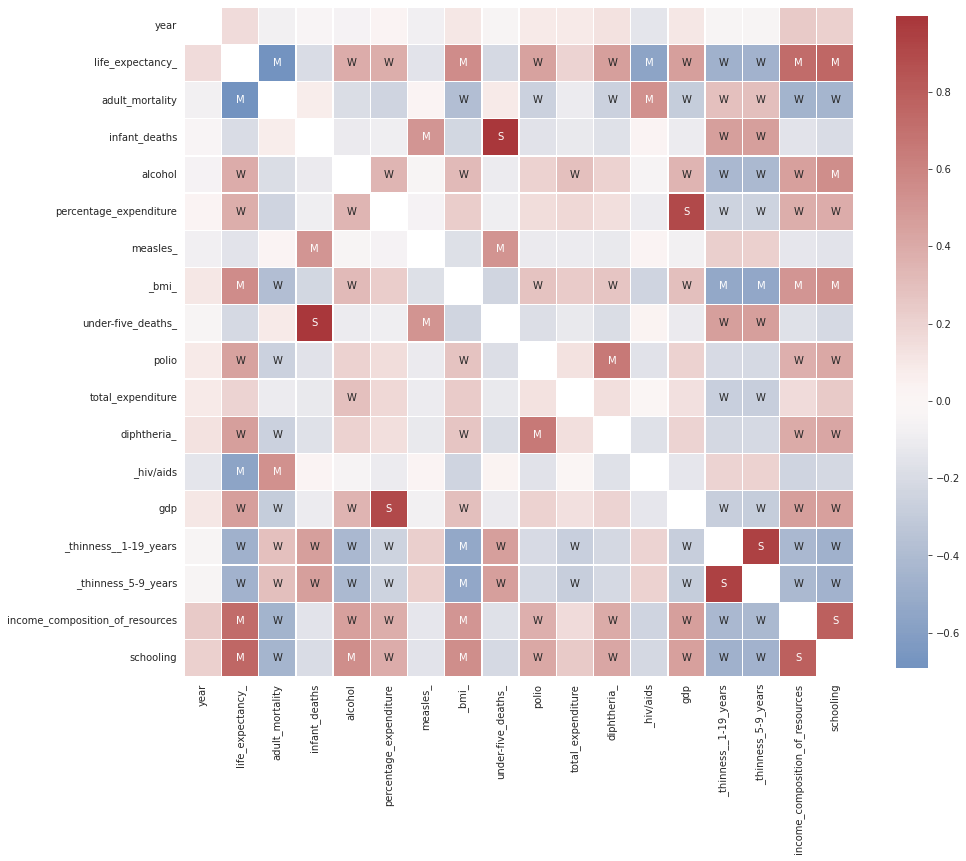

In [ ]:
# Feature Relationships
# Evaluate but remember to consider multicollinearity

# Computes feature correlation
df_corr = df.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

In [ ]:
#  Creates a mask to remove the diagonal and the upper triangle.
lower_triangle_mask = np.tril(np.ones(df_corr.shape), k=-1).astype("bool")

#  Stack all correlations, after applying the mask
df_corr_stacked = df_corr.where(lower_triangle_mask).stack().sort_values()

#  Showing the lowest and highest correlations in the correlation matrix
display(df_corr_stacked)

adult_mortality        life_expectancy_                  -0.691425
_hiv/aids              life_expectancy_                  -0.564484
_thinness_5-9_years    _bmi_                             -0.534742
_thinness__1-19_years  _bmi_                             -0.527444
schooling              _thinness__1-19_years             -0.471652
                                                            ...   
                       life_expectancy_                   0.749888
                       income_composition_of_resources    0.792051
gdp                    percentage_expenditure             0.899307
_thinness_5-9_years    _thinness__1-19_years              0.938194
under-five_deaths_     infant_deaths                      0.996636
Length: 153, dtype: float64

In [ ]:
# 5. Outliers
# a) IQR
# b) Box Plots
# c) Treat all outliers

In [ ]:
# 6. Exploratory Data Analysis
# a) Univariate Analysis
# b) Bivariate Analysis
# c) Multivariate Analysis

Text(0.5, 1.0, 'Multi-Collinearity of Features')

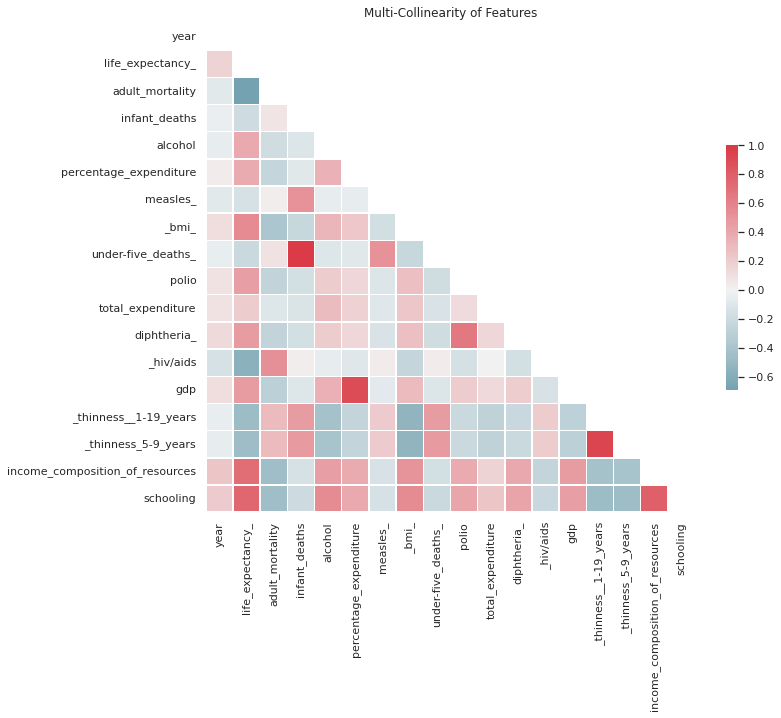

In [ ]:
# 7. Feature Selection
# a) Decide which features to keep (Data)
sns.set(style="white")
corr = df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True, 
            linewidth=.5, cbar_kws={'shrink': .5})
ax.set_title('Multi-Collinearity of Features')

# b) Decide which features to keep (Model)
# c) Treat your dataset

In [ ]:
# 8. Feature Importance
# a) Decide which features are the most important to your Model
# b) Treat your dataset

In [ ]:
# 9. Encode Data (Categorial)
# a) OHE
# Split the data into numeric and categorical lists and dataframes
numerics = ['int16','int32','int64','float64']
catDF = df.select_dtypes(exclude=numerics)
numDF = df.select_dtypes(include=numerics)
# catDF.head()
# numDF.head()

# catDF = pd.get_dummies(catDF[['country','other_cols']])  # don't include your target if it is cat
catDF = pd.get_dummies(catDF[['country']])
                       
catDF.head(20)

,country_afghanistan,country_albania,country_algeria,country_angola,country_antigua_and_barbuda,country_argentina,country_armenia,country_australia,country_austria,country_azerbaijan,country_bahamas,country_bahrain,country_bangladesh,country_barbados,country_belarus,country_belgium,country_belize,country_benin,country_bhutan,country_bolivia_(plurinational_state_of),country_bosnia_and_herzegovina,country_botswana,country_brazil,country_brunei_darussalam,country_bulgaria,country_burkina_faso,country_burundi,country_cabo_verde,country_cambodia,country_cameroon,country_canada,country_central_african_republic,country_chad,country_chile,country_china,country_colombia,country_comoros,country_congo,country_costa_rica,country_croatia,country_cuba,country_cyprus,country_czechia,country_côte_d'ivoire,country_democratic_republic_of_the_congo,country_denmark,country_djibouti,country_dominica,country_dominican_republic,country_ecuador,country_egypt,country_el_salvador,country_equatorial_guinea,country_eritrea,country_estonia,country_ethiopia,country_fiji,country_finland,country_france,country_gabon,country_gambia,country_georgia,country_germany,country_ghana,country_greece,country_grenada,country_guatemala,country_guinea,country_guinea-bissau,country_guyana,country_haiti,country_honduras,country_hungary,country_iceland,country_india,country_indonesia,country_iran_(islamic_republic_of),country_iraq,country_ireland,country_israel,country_italy,country_jamaica,country_japan,country_jordan,country_kazakhstan,country_kenya,country_kiribati,country_kuwait,country_kyrgyzstan,country_lao_people's_democratic_republic,country_latvia,country_lebanon,country_lesotho,country_liberia,country_libya,country_lithuania,country_luxembourg,country_madagascar,country_malawi,country_malaysia,country_maldives,country_mali,country_malta,country_marshall_islands,country_mauritania,country_mauritius,country_mexico,country_micronesia_(federated_states_of),country_mongolia,country_montenegro,country_morocco,country_mozambique,country_myanmar,country_namibia,country_nauru,country_nepal,country_netherlands,country_new_zealand,country_nicaragua,country_niger,country_nigeria,country_norway,country_oman,country_pakistan,country_palau,country_panama,country_papua_new_guinea,country_paraguay,country_peru,country_philippines,country_poland,country_portugal,country_qatar,country_republic_of_korea,country_republic_of_moldova,country_romania,country_russian_federation,country_rwanda,country_saint_kitts_and_nevis,country_saint_lucia,country_saint_vincent_and_the_grenadines,country_samoa,country_sao_tome_and_principe,country_saudi_arabia,country_senegal,country_serbia,country_seychelles,country_sierra_leone,country_singapore,country_slovakia,country_slovenia,country_solomon_islands,country_somalia,country_south_africa,country_spain,country_sri_lanka,country_sudan,country_suriname,country_swaziland,country_sweden,country_switzerland,country_syrian_arab_republic,country_tajikistan,country_thailand,country_the_former_yugoslav_republic_of_macedonia,country_timor-leste,country_togo,country_tonga,country_trinidad_and_tobago,country_tunisia,country_turkey,country_turkmenistan,country_tuvalu,country_uganda,country_ukraine,country_united_arab_emirates,country_united_republic_of_tanzania,country_united_states_of_america,country_uruguay,country_uzbekistan,country_vanuatu,country_venezuela_(bolivarian_republic_of),country_viet_nam,country_yemen,country_zambia,country_zimbabwe
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
# b) Label Encoding

from sklearn.preprocessing import LabelEncoder

# label_encoder object
label_encoder =LabelEncoder()
# Encode labels in column. 
catDF['status']= label_encoder.fit_transform(df['status'])
catDF.head(10)

,country_afghanistan,country_albania,country_algeria,country_angola,country_antigua_and_barbuda,country_argentina,country_armenia,country_australia,country_austria,country_azerbaijan,country_bahamas,country_bahrain,country_bangladesh,country_barbados,country_belarus,country_belgium,country_belize,country_benin,country_bhutan,country_bolivia_(plurinational_state_of),country_bosnia_and_herzegovina,country_botswana,country_brazil,country_brunei_darussalam,country_bulgaria,country_burkina_faso,country_burundi,country_cabo_verde,country_cambodia,country_cameroon,country_canada,country_central_african_republic,country_chad,country_chile,country_china,country_colombia,country_comoros,country_congo,country_costa_rica,country_croatia,country_cuba,country_cyprus,country_czechia,country_côte_d'ivoire,country_democratic_republic_of_the_congo,country_denmark,country_djibouti,country_dominica,country_dominican_republic,country_ecuador,country_egypt,country_el_salvador,country_equatorial_guinea,country_eritrea,country_estonia,country_ethiopia,country_fiji,country_finland,country_france,country_gabon,country_gambia,country_georgia,country_germany,country_ghana,country_greece,country_grenada,country_guatemala,country_guinea,country_guinea-bissau,country_guyana,country_haiti,country_honduras,country_hungary,country_iceland,country_india,country_indonesia,country_iran_(islamic_republic_of),country_iraq,country_ireland,country_israel,country_italy,country_jamaica,country_japan,country_jordan,country_kazakhstan,country_kenya,country_kiribati,country_kuwait,country_kyrgyzstan,country_lao_people's_democratic_republic,country_latvia,country_lebanon,country_lesotho,country_liberia,country_libya,country_lithuania,country_luxembourg,country_madagascar,country_malawi,country_malaysia,country_maldives,country_mali,country_malta,country_marshall_islands,country_mauritania,country_mauritius,country_mexico,country_micronesia_(federated_states_of),country_mongolia,country_montenegro,country_morocco,country_mozambique,country_myanmar,country_namibia,country_nauru,country_nepal,country_netherlands,country_new_zealand,country_nicaragua,country_niger,country_nigeria,country_norway,country_oman,country_pakistan,country_palau,country_panama,country_papua_new_guinea,country_paraguay,country_peru,country_philippines,country_poland,country_portugal,country_qatar,country_republic_of_korea,country_republic_of_moldova,country_romania,country_russian_federation,country_rwanda,country_saint_kitts_and_nevis,country_saint_lucia,country_saint_vincent_and_the_grenadines,country_samoa,country_sao_tome_and_principe,country_saudi_arabia,country_senegal,country_serbia,country_seychelles,country_sierra_leone,country_singapore,country_slovakia,country_slovenia,country_solomon_islands,country_somalia,country_south_africa,country_spain,country_sri_lanka,country_sudan,country_suriname,country_swaziland,country_sweden,country_switzerland,country_syrian_arab_republic,country_tajikistan,country_thailand,country_the_former_yugoslav_republic_of_macedonia,country_timor-leste,country_togo,country_tonga,country_trinidad_and_tobago,country_tunisia,country_turkey,country_turkmenistan,country_tuvalu,country_uganda,country_ukraine,country_united_arab_emirates,country_united_republic_of_tanzania,country_united_states_of_america,country_uruguay,country_uzbekistan,country_vanuatu,country_venezuela_(bolivarian_republic_of),country_viet_nam,country_yemen,country_zambia,country_zimbabwe,status
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
df.dtypes

country                             object
year                                 int64
status                              object
life_expectancy_                   float64
adult_mortality                    float64
infant_deaths                        int64
alcohol                            float64
percentage_expenditure             float64
measles_                             int64
_bmi_                              float64
under-five_deaths_                   int64
polio                              float64
total_expenditure                  float64
diphtheria_                        float64
_hiv/aids                          float64
gdp                                float64
_thinness__1-19_years              float64
_thinness_5-9_years                float64
income_composition_of_resources    float64
schooling                          float64
dtype: object

In [ ]:
# 10. Standardize / Normalize Data (Numeric)
# a) Normalize your features
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()

# Converting each of the columns to scaled version
numDF['alcohol_scaled'] = rob_scaler.fit_transform\
                        (numDF['alcohol'].values.reshape(-1,1))
numDF['gdp_scaled'] = rob_scaler.fit_transform\
                        (numDF['gdp']\
                         .values.reshape(-1,1))
numDF['schooling_scaled'] = rob_scaler.fit_transform\
                        (numDF['schooling']\
                         .values.reshape(-1,1))
# Dropping the original columns
numDF.drop(['alcohol','gdp','schooling'], axis=1, inplace=True)
numDF.sample(3)
# b) Standardize your features


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,year,life_expectancy_,adult_mortality,infant_deaths,percentage_expenditure,measles_,_bmi_,under-five_deaths_,polio,total_expenditure,diphtheria_,_hiv/aids,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,alcohol_scaled,gdp_scaled,schooling_scaled
1969,2005,72.1,163.0,3,20.680373,0,42.8,4,96.0,6.70,96.0,0.2,2.3,2.2,0.646,0.379868,-0.295625,-0.023810
2231,2014,75.4,123.0,1,8.617208,37,59.4,1,93.0,1.37,93.0,0.1,2.1,2.1,0.771,0.778104,-0.312955,0.452381
2472,2014,64.4,294.0,7,0.000000,594,56.2,8,52.0,3.25,43.0,0.1,6.3,6.1,0.575,-0.556209,NaN,-0.809524


In [ ]:
# This is how you merge the datasets back together:
# Merge back into a single df
# preparing the X Variables  (Don't forget ot remove the target!!)
X = pd.concat([catDF,numDF],axis=1)
print(X.shape)

# This is how you extract the target variable
# y = df_X['Sex_of_Driver']
# X.drop(['Sex_of_Driver'],axis=1,inplace=True)

(2852, 205)


In [ ]:
# 11. Evaluate Algorithms
# a) Split-out validation dataset
# Split the data into test, train, validation sets... 80/20
from sklearn.model_selection import train_test_split
# This gives the 80/20 train test split
df_train_full, df_test = train_test_split(X, test_size=0.2, random_state=11)

len(df_train_full), len(df_test)
# Replace nulls with 0's - these are pandas dataframes
df_train_full = df_train_full.fillna(0)

df_test = df_test.fillna(0)
len(df_train_full),len(df_test)
type(df_train_full)

(2281, 571)

(2281, 571)

pandas.core.frame.DataFrame

In [ ]:
#Split the y out into train/test/splits... these are numpy ndarrays ... msrp is your target variables
# Replace with your target variable!!!  
y_train = (df_train_full.status).values
y_test = (df_test.status).values
del df_train_full['status']
del df_test['status']

LogisticRegression(solver='liblinear')

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LR: 0.973259 (0.025455)
Score for each of the 10 K-fold tests:  [0.96943231 0.92982456 0.9254386  0.99122807 0.99122807 0.98684211
 0.99561404 1.         0.98245614 0.96052632]
LogisticRegression(solver='liblinear')
	Training time: 0.122s
	Prediction time: 1.737s



LinearDiscriminantAnalysis()

LDA: 0.999561 (0.001316)
Score for each of the 10 K-fold tests:  [1.         1.         1.         1.         1.         0.99561404
 1.         1.         1.         1.        ]
LinearDiscriminantAnalysis()
	Training time: 0.243s
	Prediction time: 2.046s



KNeighborsClassifier()

KNN: 0.860595 (0.021411)
Score for each of the 10 K-fold tests:  [0.84279476 0.85964912 0.85964912 0.85964912 0.88157895 0.80701754
 0.87280702 0.86403509 0.88596491 0.87280702]
KNeighborsClassifier()
	Training time: 0.016s
	Prediction time: 0.558s



DecisionTreeClassifier()

CART: 0.996934 (0.004403)
Score for each of the 10 K-fold tests:  [0.99126638 1.         1.         0.98684211 1.         0.99561404
 1.         1.         0.99561404 1.        ]
DecisionTreeClassifier()
	Training time: 0.366s
	Prediction time: 0.801s



GaussianNB()

NB: 0.746606 (0.027826)
Score for each of the 10 K-fold tests:  [0.73799127 0.72807018 0.74122807 0.75438596 0.79385965 0.77631579
 0.75438596 0.71929825 0.69298246 0.76754386]
GaussianNB()
	Training time: 0.027s
	Prediction time: 0.231s



SVC(gamma='auto')

SVM: 0.840864 (0.018463)
Score for each of the 10 K-fold tests:  [0.82969432 0.84210526 0.82017544 0.8245614  0.87719298 0.84210526
 0.82894737 0.8245614  0.86842105 0.85087719]
SVC(gamma='auto')
	Training time: 0.782s
	Prediction time: 8.101s



Text(0.5, 0.98, 'Algorithm Comparison')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2e60686f50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2e606c7e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2e606862d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f2e60692890>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2e60692d10>,
 'means': []}

[Text(0, 0, 'LR'),
 Text(0, 0, 'LDA'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'CART'),
 Text(0, 0, 'NB'),
 Text(0, 0, 'SVM')]

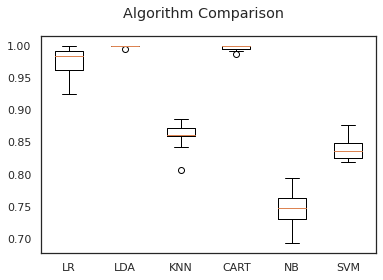

In [ ]:
# Compare Algorithms with the Algorithm Harness
from sklearn.metrics import roc_auc_score
from time import time
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    start = time()
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    model.fit(df_train_full, y_train)
    train_time = time() - start
    cv_results = cross_val_score(model, df_train_full, y_train, cv=kfold, scoring=scoring)
    predict_time = time()-start 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    #y_pred = model.predict_proba(X_train)[:, 1]
    #auc = roc_auc_score(y_train, y_pred)
    print(msg)
    print("Score for each of the 10 K-fold tests: ",cv_results)
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    #y_pred = model.predict(X_test)
    #print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print()
    
    
    
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()